<a href="https://colab.research.google.com/github/Pintu1-data/Mumbai-Air-Quality-Index-EDA/blob/main/ChhatrapatiShivajiIntlAirportT2MumbaiMPCB_AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [227]:
# -- Libraries --
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import heapq

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Warning
import warnings
warnings.filterwarnings("ignore")

from tabulate import tabulate

In [228]:
df = pd.read_csv('/content/drive/MyDrive/Omdena data/ChhatrapatiShivajiIntlAirportT2MumbaiMPCB.csv',)

In [229]:
df.head()

,Unnamed: 0,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,...,Eth-Benzene,MP-Xylene,RH,WS,WD,SR,BP,AT,TOT-RF,Unnamed: 23
0,1,01-01-2021 00:00,01-01-2021 00:15,81.27,251,74.94,50.55,125.48,40.01,9.95,...,10.81,6.3,68.88,0.33,197.47,None,None,25.2,0,NaN
1,2,01-01-2021 00:15,01-01-2021 00:30,81,251,75.58,49.01,124.6,41.14,11.93,...,6.71,11.93,68.75,0.2,227.29,None,None,25.07,0,NaN
2,3,01-01-2021 00:30,01-01-2021 00:45,81,251,86.29,45.26,131.55,40.99,12.48,...,14.83,5.89,70.34,0.21,224.37,None,None,24.85,0,NaN
3,4,01-01-2021 00:45,01-01-2021 01:00,81,270.44,99.42,37.85,137.3,41.56,13.55,...,14.27,6.84,74.45,0.24,182.25,None,None,24.7,0,NaN
4,5,01-01-2021 01:00,01-01-2021 01:15,96.47,305,105.88,36.26,142.14,40.86,13.17,...,13.85,7.76,78.17,0.25,207.07,None,None,24.51,0,NaN


In [230]:
df.tail()

,Unnamed: 0,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,...,Eth-Benzene,MP-Xylene,RH,WS,WD,SR,BP,AT,TOT-RF,Unnamed: 23
76316,76317,06-03-2023 23:00,06-03-2023 23:15,48,244,74.58,30.02,104.59,22.34,9.01,...,None,11.7,47.51,1.2,138.13,None,1012.39,27.55,0,NaN
76317,76318,06-03-2023 23:15,06-03-2023 23:30,48,244,70.06,32.84,102.86,23.56,8.57,...,1.34,None,46.59,1.43,127.35,None,1012.32,27.73,0,NaN
76318,76319,06-03-2023 23:30,06-03-2023 23:45,48,244,68.42,30.47,98.89,27.25,8.64,...,1.67,None,46.86,1.1,139.45,None,1012.44,27.75,0,NaN
76319,76320,06-03-2023 23:45,07-03-2023 00:00,47.12,219.47,73.46,29.08,102.54,28.52,9.34,...,None,35.39,46.6,1.49,143.2,None,1012.41,27.69,0,NaN
76320,76321,07-03-2023 00:00,07-03-2023 00:00,47,148,67.08,31.25,98.34,26.26,8.68,...,None,60.95,46.71,1.62,131.4,None,1012.33,27.64,0,NaN


In [231]:
#columns of dataset
df.columns

Index(['Unnamed: 0', 'From Date', 'To Date', 'PM2.5', 'PM10', 'NO', 'NO2',
       'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene',
       'MP-Xylene', 'RH', 'WS', 'WD', 'SR', 'BP', 'AT', 'TOT-RF',
       'Unnamed: 23'],
      dtype='object')

In [232]:
# drop unnessery columns
df.drop(['To Date','Toluene', 'Eth-Benzene','MP-Xylene', 'RH', 'WS', 'WD', 'SR', 'BP', 'AT', 'TOT-RF'], axis=1, inplace=True)

In [233]:
# drop unnessery columns
df.drop(['Unnamed: 0','Unnamed: 23'], axis=1, inplace=True)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76321 entries, 0 to 76320
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  76321 non-null  object
 1   PM2.5      76321 non-null  object
 2   PM10       76321 non-null  object
 3   NO         76321 non-null  object
 4   NO2        76321 non-null  object
 5   NOx        76321 non-null  object
 6   NH3        76321 non-null  object
 7   SO2        76321 non-null  object
 8   CO         76321 non-null  object
 9   Ozone      76321 non-null  object
 10  Benzene    76321 non-null  object
dtypes: object(11)
memory usage: 6.4+ MB


In [235]:
df.isnull()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
76316,False,False,False,False,False,False,False,False,False,False,False
76317,False,False,False,False,False,False,False,False,False,False,False
76318,False,False,False,False,False,False,False,False,False,False,False
76319,False,False,False,False,False,False,False,False,False,False,False


In [236]:
df.shape

(76321, 11)

In [237]:
#columns of dataset
df.columns

Index(['From Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO',
       'Ozone', 'Benzene'],
      dtype='object')

In [238]:
df = df.replace('None', np.nan)

In [239]:
df = df.astype({'PM2.5':'float', 'PM10':'float', 'NO':'float', 'NO2':'float', 'NOx':'float', 'NH3':'float','SO2':'float', 'CO':'float', 'Ozone':'float', 'Benzene':'float'})

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76321 entries, 0 to 76320
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  76321 non-null  object 
 1   PM2.5      67063 non-null  float64
 2   PM10       72314 non-null  float64
 3   NO         61100 non-null  float64
 4   NO2        59965 non-null  float64
 5   NOx        61375 non-null  float64
 6   NH3        58098 non-null  float64
 7   SO2        64432 non-null  float64
 8   CO         63566 non-null  float64
 9   Ozone      64808 non-null  float64
 10  Benzene    61363 non-null  float64
dtypes: float64(10), object(1)
memory usage: 6.4+ MB


In [241]:
# rename column ' From Date' to 'Date'
df = df.rename(columns={'From Date': 'Date'})

In [242]:
df.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene
0,01-01-2021 00:00,81.27,251.00,74.94,50.55,125.48,40.01,9.95,1.87,6.76,0.05
1,01-01-2021 00:15,81.00,251.00,75.58,49.01,124.60,41.14,11.93,1.93,3.44,0.19
2,01-01-2021 00:30,81.00,251.00,86.29,45.26,131.55,40.99,12.48,1.97,3.39,0.38
3,01-01-2021 00:45,81.00,270.44,99.42,37.85,137.30,41.56,13.55,2.01,4.43,0.43
4,01-01-2021 01:00,96.47,305.00,105.88,36.26,142.14,40.86,13.17,2.05,3.75,0.23


In [243]:
df.shape

(76321, 11)

In [244]:
#check for null value in dataset
df.isna().sum()

Date           0
PM2.5       9258
PM10        4007
NO         15221
NO2        16356
NOx        14946
NH3        18223
SO2        11889
CO         12755
Ozone      11513
Benzene    14958
dtype: int64

***Analyzing missing***

<Axes: >

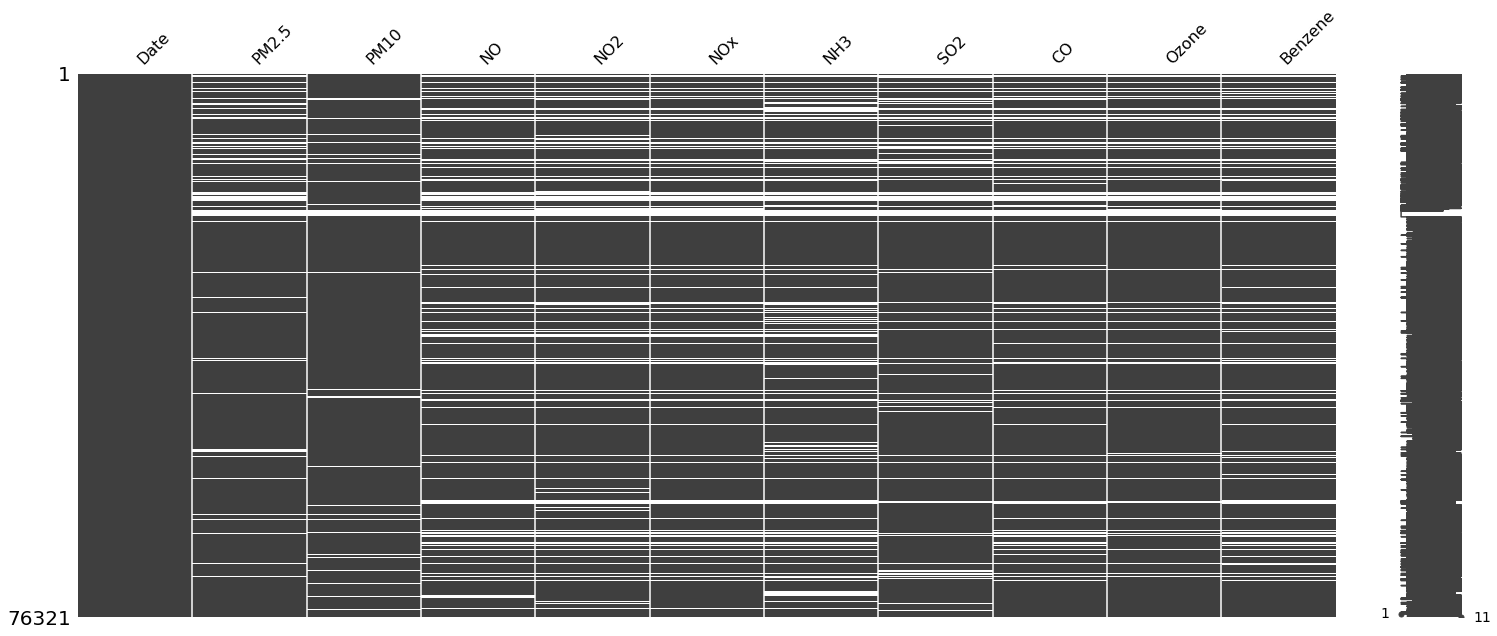

In [245]:
plt.rcParams['figure.figsize']=(10,6)
import missingno as msno
msno.matrix(df)

In [246]:
df.dropna(inplace=True)

In [247]:
#check for null value in dataset
df.isna().sum()

Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
SO2        0
CO         0
Ozone      0
Benzene    0
dtype: int64

In [248]:
df.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene
0,01-01-2021 00:00,81.27,251.00,74.94,50.55,125.48,40.01,9.95,1.87,6.76,0.05
1,01-01-2021 00:15,81.00,251.00,75.58,49.01,124.60,41.14,11.93,1.93,3.44,0.19
2,01-01-2021 00:30,81.00,251.00,86.29,45.26,131.55,40.99,12.48,1.97,3.39,0.38
3,01-01-2021 00:45,81.00,270.44,99.42,37.85,137.30,41.56,13.55,2.01,4.43,0.43
4,01-01-2021 01:00,96.47,305.00,105.88,36.26,142.14,40.86,13.17,2.05,3.75,0.23


In [249]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.strftime('%d'+'-'+'%m')
df['Month']=df['Date'].dt.strftime('%m'+'-'+'%y')
df['Year']=df['Date'].dt.strftime('%y')

df.head()
     

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Day,Month,Year
0,2021-01-01 00:00:00,81.27,251.00,74.94,50.55,125.48,40.01,9.95,1.87,6.76,0.05,01-01,01-21,21
1,2021-01-01 00:15:00,81.00,251.00,75.58,49.01,124.60,41.14,11.93,1.93,3.44,0.19,01-01,01-21,21
2,2021-01-01 00:30:00,81.00,251.00,86.29,45.26,131.55,40.99,12.48,1.97,3.39,0.38,01-01,01-21,21
3,2021-01-01 00:45:00,81.00,270.44,99.42,37.85,137.30,41.56,13.55,2.01,4.43,0.43,01-01,01-21,21
4,2021-01-01 01:00:00,96.47,305.00,105.88,36.26,142.14,40.86,13.17,2.05,3.75,0.23,01-01,01-21,21


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50259 entries, 0 to 76320
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     50259 non-null  datetime64[ns]
 1   PM2.5    50259 non-null  float64       
 2   PM10     50259 non-null  float64       
 3   NO       50259 non-null  float64       
 4   NO2      50259 non-null  float64       
 5   NOx      50259 non-null  float64       
 6   NH3      50259 non-null  float64       
 7   SO2      50259 non-null  float64       
 8   CO       50259 non-null  float64       
 9   Ozone    50259 non-null  float64       
 10  Benzene  50259 non-null  float64       
 11  Day      50259 non-null  object        
 12  Month    50259 non-null  object        
 13  Year     50259 non-null  object        
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 5.8+ MB


Plotting correlation matrix

<Axes: >

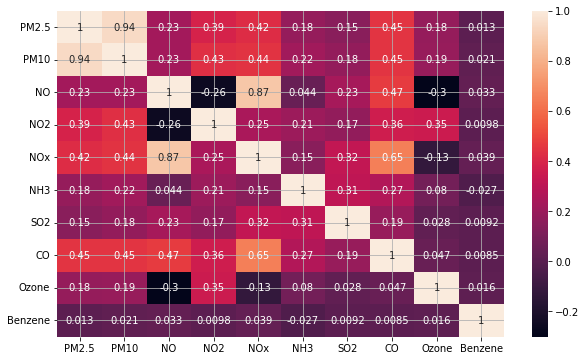

In [251]:
sns.heatmap(df.corr(),annot=True)

Analyzing PM10 each month

In [252]:
PM10_by_month=df.groupby('Month') ['PM10'].max()
PM10_by_month
     

Month
01-21    442.00
01-22    985.00
01-23    488.60
02-21    517.00
02-22    385.00
02-23    505.00
03-21    492.00
03-22    572.00
03-23    541.24
04-21    453.45
04-22    512.00
04-23    542.00
05-21    489.00
05-22    441.00
05-23    500.00
06-21    369.00
06-22    558.00
06-23    810.00
07-21    332.00
07-22    368.00
07-23    343.00
08-21    353.00
08-22    420.00
08-23    418.22
09-21    415.00
09-22    346.00
09-23    505.00
10-21    490.00
10-22    985.00
10-23    412.00
11-21    398.00
11-22    445.00
11-23    304.00
12-21    469.00
12-22    514.00
12-23    310.30
Name: PM10, dtype: float64

Text(0, 0.5, 'Maximum PM10')

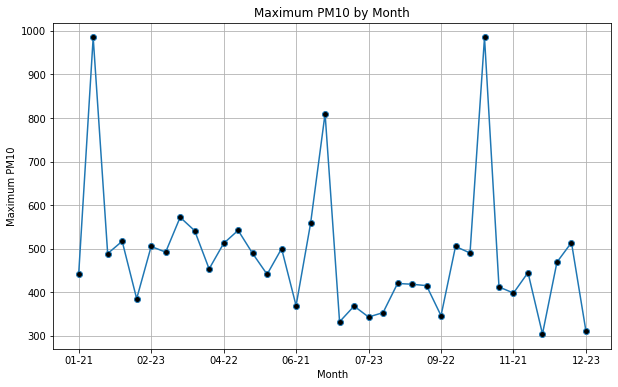

In [253]:
PM10_by_month.plot(kind='line',marker='o',markerfacecolor='k')


plt.grid(True)
plt.rcParams['axes.grid'] = True
plt.title('Maximum PM10 by Month')
plt.xlabel('Month')
plt.ylabel('Maximum PM10')

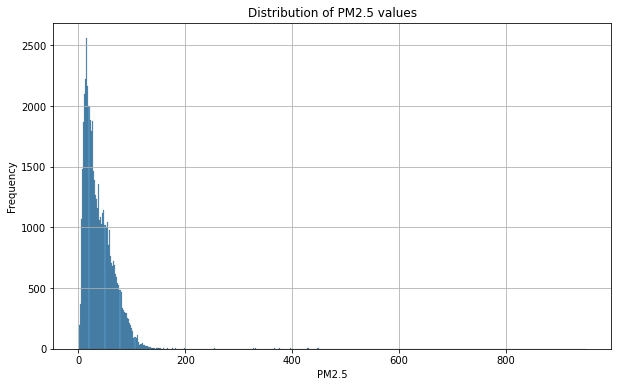

In [254]:
# Create a histogram of PM2.5 values to visualize the distribution
sns.histplot(data=df, x='PM2.5')
plt.title('Distribution of PM2.5 values')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()


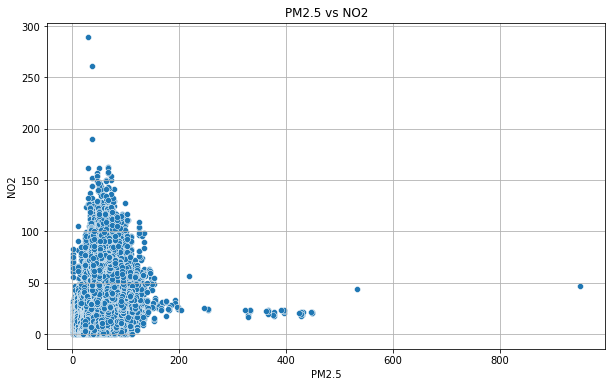

In [255]:
# Create a scatter plot to visualize the relationship between PM2.5 and NO2
sns.scatterplot(data=df, x='PM2.5', y='NO2')
plt.title('PM2.5 vs NO2')
plt.xlabel('PM2.5')
plt.ylabel('NO2')
plt.show()


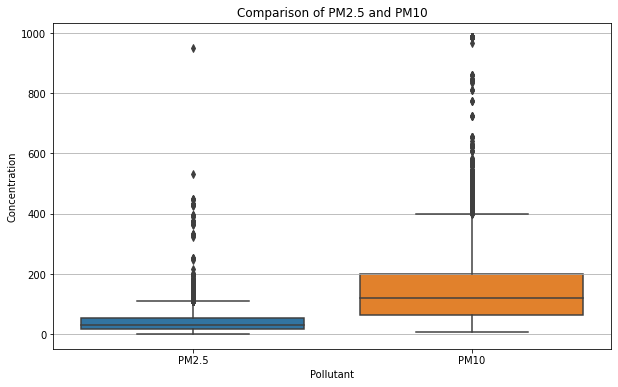

In [256]:
# Create a box plot to compare the distribution of PM2.5 and PM10 values
sns.boxplot(data=df[['PM2.5', 'PM10']])
plt.title('Comparison of PM2.5 and PM10')
plt.xlabel('Pollutant')
plt.ylabel('Concentration')
plt.show()